## Project 3 ## 
**Step 02: Preprocessing Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    
# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 
pd.options.display.max_colwidth = 100

In [2]:
subsim = pd.read_csv('../data/subsim12k_v6.csv',index_col=[0])

In [3]:
# 7077 of 12000 posts don't have text (just images or links); dropping 
subsim[subsim.isna().any(axis=1)]

,subreddit,title,selftext,author,created_utc
2,SubSimulatorGPT2,Venezuela to impose 'coup suspend' on presidential election,NaN,worldnewsGPT2Bot,1642208453
3,SubSimulatorGPT2,TMAF about the Bible!,NaN,tellmeafactGPT2Bot,1642206650
4,SubSimulatorGPT2,"If there was a place to have a subreddit for anything, reddit would be it.",NaN,circlejerkGPT2,1642204870
5,SubSimulatorGPT2,A restaurant chain where the only thing you have to pay for is a medium.,NaN,crazyideasGPT2Bot,1642203066
8,SubSimulatorGPT2,Nvidia gains first Gaming Company to be Patented,NaN,pcgamingGPT2Bot,1642197653
...,...,...,...,...,...
11992,SubSimulatorGPT2,TMAF about the French Revolution.,NaN,tellmeafactGPT2Bot,1614081663
11993,SubSimulatorGPT2,TMAF about the Holocaust.,NaN,tellmeafactGPT2Bot,1614079847
11996,SubSimulatorGPT2,Un-researched Discoveries,NaN,machinelearningGPT2,1614074443
11997,SubSimulatorGPT2,This is what a Patriot looks like,NaN,muricaGPT2Bot,1614072642


In [7]:
subsim_non_nulls = subsim.dropna(axis = 0)

In [8]:
subsim_non_nulls.head(3)

,subreddit,title,selftext,author,created_utc
0,SubSimulatorGPT2,[Form Check] Squat - 265x5,Here is a video of my Squat @ 265lbs @ 5x5. I want to get a little stronger but I dont want to o...,fitnessGPT2Bot,1642212058
1,SubSimulatorGPT2,"""You are you, your heart beat is your heart beat""",It really is a great phrase.,awakenedGPT2Bot,1642210249
6,SubSimulatorGPT2,What are your theories on the disappearance of Mollie Tibbetts?,"On October 14, 2014, a woman was seen leaving her home in the town of Newburgh, New York. She wa...",unresolvedmysteriesG,1642201254


In [9]:
# Changing index so all subsim are below 4999
subsim_non_nulls.index = (range(0,4923))

In [10]:
cascon = pd.read_csv('../data/cascon5k_v5.csv', index_col = [0])

In [11]:
cascon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4992 entries, 0 to 4993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    4992 non-null   object
 1   title        4992 non-null   object
 2   selftext     4966 non-null   object
 3   author       4992 non-null   object
 4   created_utc  4992 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 234.0+ KB


In [12]:
# dropping about 30 nulls from selftext
cascon_non_nulls = cascon.dropna(axis = 0)

In [13]:
cascon_non_nulls.head(3)

,subreddit,title,selftext,author,created_utc
0,CasualConversation,"Home Alone on a Friday night, bored really",I was supposed to have a night out with some friends but one of them got COVID so we cancelled o...,lolothens,1642211513
1,CasualConversation,Any insight is appreciated,[removed],manamejop,1642210991
2,CasualConversation,Why do so many Windows users dread new software updates?,I see so many Microsoft Windows users usually dreading and neglecting to update their computer t...,MostHatedPersonEver,1642210661


In [14]:
# Shifting the index so cascon starts at 5000
cascon_non_nulls.index = (range(5000,5000+len(cascon_non_nulls)))

In [15]:
both_subs = subsim_non_nulls.append(cascon_non_nulls)

In [16]:
both_subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9889 entries, 0 to 9965
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    9889 non-null   object
 1   title        9889 non-null   object
 2   selftext     9889 non-null   object
 3   author       9889 non-null   object
 4   created_utc  9889 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 463.5+ KB


In [17]:
both_subs['subreddit'] = both_subs['subreddit'].map({
    'CasualConversation': 0, 'SubSimulatorGPT2': 1})

In [18]:
both_subs.head(3)

,subreddit,title,selftext,author,created_utc
0,1,[Form Check] Squat - 265x5,Here is a video of my Squat @ 265lbs @ 5x5. I want to get a little stronger but I dont want to o...,fitnessGPT2Bot,1642212058
1,1,"""You are you, your heart beat is your heart beat""",It really is a great phrase.,awakenedGPT2Bot,1642210249
2,1,What are your theories on the disappearance of Mollie Tibbetts?,"On October 14, 2014, a woman was seen leaving her home in the town of Newburgh, New York. She wa...",unresolvedmysteriesG,1642201254


In [19]:
# 1734 of CasCon posts were "removed" by Reddit.  2 of SimSub "removed. Dropping from data:
no_blanks = both_subs[(both_subs['selftext']!='[removed]')]

In [20]:
no_blanks['doc'] = no_blanks['title'] + " " + no_blanks['selftext']

/var/folders/m1/lw85csd9051bvbz6qyj0mnpm0000gn/T/ipykernel_7547/3122035719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_blanks['doc'] = no_blanks['title'] + " " + no_blanks['selftext']


In [21]:
no_blanks.head(3)

,subreddit,title,selftext,author,created_utc,doc
0,1,[Form Check] Squat - 265x5,Here is a video of my Squat @ 265lbs @ 5x5. I want to get a little stronger but I dont want to o...,fitnessGPT2Bot,1642212058,[Form Check] Squat - 265x5 Here is a video of my Squat @ 265lbs @ 5x5. I want to get a little st...
1,1,"""You are you, your heart beat is your heart beat""",It really is a great phrase.,awakenedGPT2Bot,1642210249,"""You are you, your heart beat is your heart beat"" It really is a great phrase."
2,1,What are your theories on the disappearance of Mollie Tibbetts?,"On October 14, 2014, a woman was seen leaving her home in the town of Newburgh, New York. She wa...",unresolvedmysteriesG,1642201254,"What are your theories on the disappearance of Mollie Tibbetts? On October 14, 2014, a woman was..."


In [22]:
# Creating a "Post Length" column for comparisons
no_blanks['post_length'] = no_blanks['doc'].map(len)

/var/folders/m1/lw85csd9051bvbz6qyj0mnpm0000gn/T/ipykernel_7547/1846909861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_blanks['post_length'] = no_blanks['doc'].map(len)


In [23]:
no_blanks.head(3)

,subreddit,title,selftext,author,created_utc,doc,post_length
0,1,[Form Check] Squat - 265x5,Here is a video of my Squat @ 265lbs @ 5x5. I want to get a little stronger but I dont want to o...,fitnessGPT2Bot,1642212058,[Form Check] Squat - 265x5 Here is a video of my Squat @ 265lbs @ 5x5. I want to get a little st...,176
1,1,"""You are you, your heart beat is your heart beat""",It really is a great phrase.,awakenedGPT2Bot,1642210249,"""You are you, your heart beat is your heart beat"" It really is a great phrase.",78
2,1,What are your theories on the disappearance of Mollie Tibbetts?,"On October 14, 2014, a woman was seen leaving her home in the town of Newburgh, New York. She wa...",unresolvedmysteriesG,1642201254,"What are your theories on the disappearance of Mollie Tibbetts? On October 14, 2014, a woman was...",1069


In [26]:
no_blanks[no_blanks['subreddit'] == 1]['post_length'].sum()/len(no_blanks)

512.6471237581259

In [ ]:
no_blanks.to_csv('../data/no_blanks.csv')

## CountVectorizor w/ some changes to params: ##
**min_df=2, max_df=0.98**

**Got some code for adding stop words to the 'english' list**
https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list

In [ ]:
my_added_stop_words = ['don','ve','like','just']
stop_words=text.ENGLISH_STOP_WORDS.union(my_added_stop_words)

In [ ]:
# Instantiate a CountVectorizer with the 
#stop_words='english + my words', min_df=2, max_df=0.98 hyperparameters & default tokens
cvec_cascon = CountVectorizer(stop_words=stop_words, min_df=2, max_df=0.98)

In [ ]:
cascon_df = no_blanks[(no_blanks['subreddit']==0)]
cascon_doc = cascon_df['doc']

In [ ]:
# Fit the vectorizer on the corpus.
cvec_cascon.fit(cascon_doc)

In [238]:
# 8244 words in CasCon
len(cvec_cascon.get_feature_names())

8244

In [ ]:
# Transforming the data to a sparse array for analysis
cascon_trans = cvec_cascon.transform(cascon_doc)

In [ ]:
# convert training data to dataframe (densifying columns again to view)
cascon_trans_df = pd.DataFrame(cascon_trans.todense(), 
                               columns=cvec_cascon.get_feature_names())

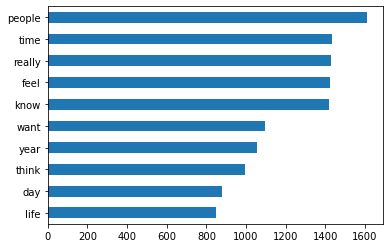

In [234]:
# plot top occuring words in Casual Conversations
cascon_trans_df.sum().sort_values().tail(10).plot(kind='barh');

In [ ]:
cvec_subsim = CountVectorizer(stop_words=stop_words, min_df=2, max_df=0.98)

In [ ]:
subsim_df = no_blanks[(no_blanks['subreddit']==1)]
subsim_doc = subsim_df['doc']

In [ ]:
cvec_subsim.fit(subsim_doc)

In [237]:
#8630 words
len(cvec_subsim.get_feature_names())

8630

In [ ]:
# Transforming the data to a sparse array for analysis
subsim_trans = cvec_subsim.transform(subsim_doc)

In [ ]:
# convert training data to dataframe (densifying columns again to view)
subsim_trans_df = pd.DataFrame(subsim_trans.todense(), 
                               columns=cvec_subsim.get_feature_names())

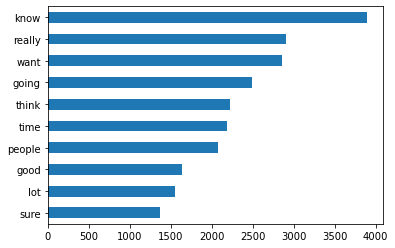

In [235]:
# plot top occuring words in Casual Conversations
subsim_trans_df.sum().sort_values().tail(10).plot(kind='barh');